In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 98.0 MB/s eta 0:00:00


In [3]:
!pip install wxee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 5.2 MB/s eta 0:00:00


In [4]:
!pip install rasterio netCDF4 wxee timm cartopy osmnx xarray pyresample
!apt-get install -y gdal-bin
!pip install gdal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.8/484.8 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-gdal python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 5,168 kB of archives.
After this operation, 25.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3

In [5]:
import ee
import os

# Set the path to the service account key file
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'

# Use the service account for authentication
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)
generate_dmsp = True

In [11]:
# Approx bounding box that covers Punjab in both India & Pakistan
aoi_city_smaller = ee.Geometry.Rectangle(
    coords=[-101.5, 28.0, -97.5, 32.7],  # [xmin, ymin, xmax, ymax]
    proj=None,
    geodesic=False
)

# Flooding from Sentinel 1 SAR

In [12]:
import wxee
dataset=ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2025-06-10', '2025-07-10').filterBounds(aoi_city_smaller).select('VV')
# dataset = dataset.set('system:time_start', 0)
ds_s1 = dataset.wx.to_xarray(region=aoi_city_smaller.bounds(),scale=1000)
ds_s1

Requesting data:   0%|          | 0/64 [00:00<?, ?it/s]

<xarray.Dataset> Size: 120MB
Dimensions:      (time: 64, x: 446, y: 525)
Coordinates:
  * time         (time) datetime64[ns] 512B 2025-06-10T00:43:01 ... 2025-07-0...
  * x            (x) float64 4kB -101.5 -101.5 -101.5 ... -97.52 -97.51 -97.5
  * y            (y) float64 4kB 32.7 32.69 32.69 32.68 ... 28.01 28.0 28.0
    spatial_ref  int64 8B 0
Data variables:
    VV           (time, y, x) float64 120MB nan nan nan nan ... nan nan nan nan
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

In [13]:
prev_sar = ds_s1.sel(time=slice('2025-06-10', '2025-06-20')).mean(dim='time')
prev_sar

<xarray.Dataset> Size: 2MB
Dimensions:      (x: 446, y: 525)
Coordinates:
  * x            (x) float64 4kB -101.5 -101.5 -101.5 ... -97.52 -97.51 -97.5
  * y            (y) float64 4kB 32.7 32.69 32.69 32.68 ... 28.01 28.0 28.0
    spatial_ref  int64 8B 0
Data variables:
    VV           (y, x) float64 2MB -12.34 -13.86 -12.77 ... -8.251 -7.924

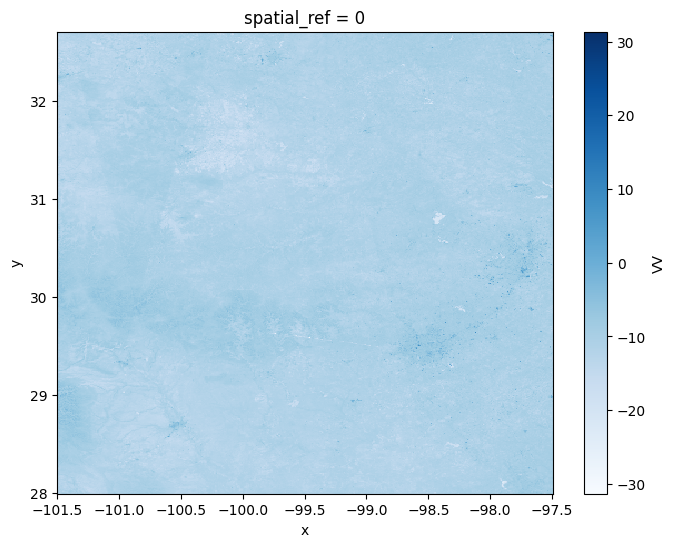

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

prev_sar.VV.plot(cmap='Blues', ax=axes)

In [15]:
post_sar = ds_s1.sel(time=slice('2025-07-01', '2025-07-10')).mean(dim='time')
post_sar

<xarray.Dataset> Size: 2MB
Dimensions:      (x: 446, y: 525)
Coordinates:
  * x            (x) float64 4kB -101.5 -101.5 -101.5 ... -97.52 -97.51 -97.5
  * y            (y) float64 4kB 32.7 32.69 32.69 32.68 ... 28.01 28.0 28.0
    spatial_ref  int64 8B 0
Data variables:
    VV           (y, x) float64 2MB -11.93 -12.59 -11.87 -12.49 ... nan nan nan

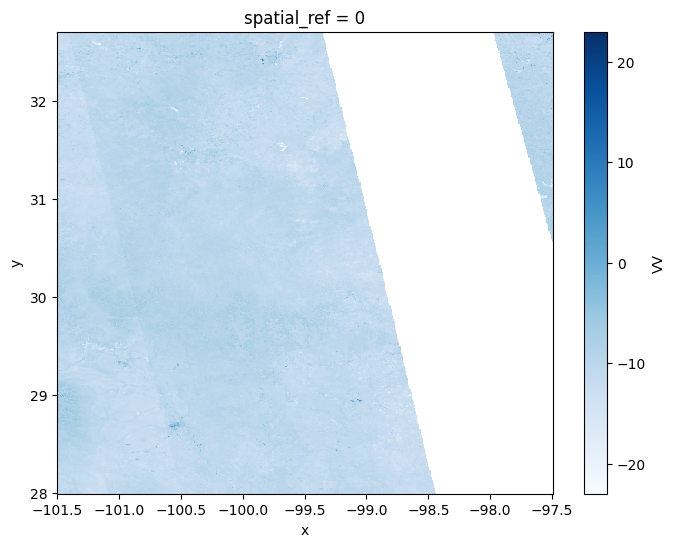

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

post_sar.VV.plot(cmap='Blues', ax=axes)

In [17]:
s1_diff = post_sar.VV - prev_sar.VV
s1_diff

<xarray.DataArray 'VV' (y: 525, x: 446)> Size: 2MB
array([[ 0.40820546,  1.26643108,  0.90066223, ..., -0.14303256,
         0.70680872, -0.34008186],
       [ 1.02349963,  0.84352414,  1.01186823, ..., -0.01189781,
        -1.66178775, -0.02073502],
       [ 1.15305733,  0.67348875,  0.93685655, ...,  3.14963978,
         0.8574337 , -0.0174021 ],
       ...,
       [ 1.61148657,  1.26037479,  1.64498978, ...,         nan,
                nan,         nan],
       [ 1.71007013,  1.27861416,  1.29219748, ...,         nan,
                nan,         nan],
       [ 1.37172567,  1.58330645,  1.9271553 , ...,         nan,
                nan,         nan]])
Coordinates:
  * x            (x) float64 4kB -101.5 -101.5 -101.5 ... -97.52 -97.51 -97.5
  * y            (y) float64 4kB 32.7 32.69 32.69 32.68 ... 28.01 28.0 28.0
    spatial_ref  int64 8B 0

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:205: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces.zip
  result_path = self.acquire_resource(target_path, format_dict)


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:205: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  result_path = self.acquire_resource(target_path, format_dict)


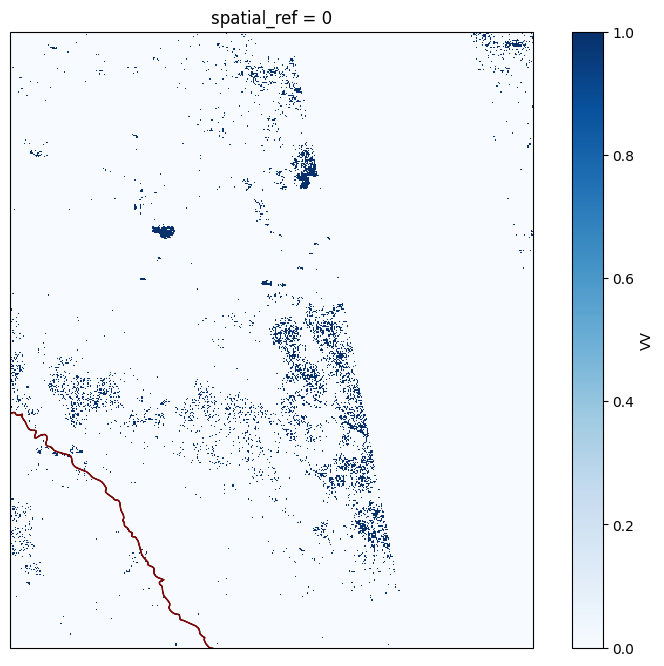

In [18]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
# Add states/provinces (admin level-1)
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_1_states_provinces')
reader = shpreader.Reader(shpfilename)
states = cfeature.ShapelyFeature(reader.geometries(),
                                 ccrs.PlateCarree(),
                                 edgecolor='darkred',
                                 facecolor='none',
                                 linewidth=0.8)


# Assuming s1_diff_mask is an xarray DataArray with lat/lon coords
fig, ax = plt.subplots(
    figsize=(10, 8),
    subplot_kw={"projection": ccrs.PlateCarree()}
)
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")

ax.add_feature(states)


s1_diff_mask = s1_diff<-1.0
s1_diff_mask.plot(cmap='Blues', ax=ax)

/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3473: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if (await self.run_code(code, result,  async_=asy)):


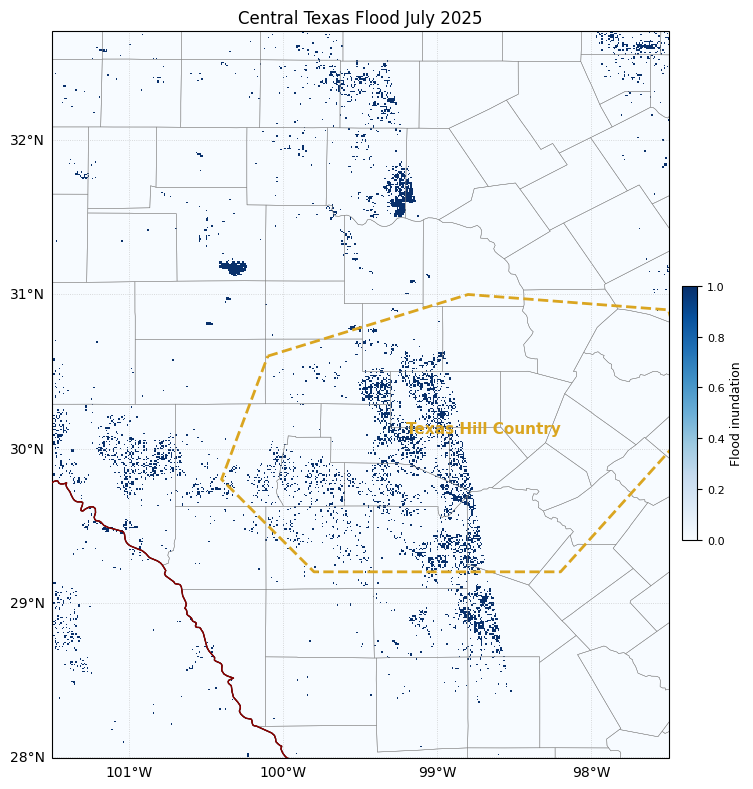

In [26]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
from shapely.geometry import Polygon
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- states/provinces layer ---
shpfilename_states = shpreader.natural_earth(
    resolution='10m', category='cultural', name='admin_1_states_provinces'
)
states = cfeature.ShapelyFeature(
    shpreader.Reader(shpfilename_states).geometries(),
    ccrs.PlateCarree(),
    edgecolor='darkred',
    facecolor='none',
    linewidth=0.8
)

# --- counties layer ---
shpfilename_counties = shpreader.natural_earth(
    resolution='10m', category='cultural', name='admin_2_counties'
)
counties = cfeature.ShapelyFeature(
    shpreader.Reader(shpfilename_counties).geometries(),
    ccrs.PlateCarree(),
    edgecolor='gray',
    facecolor='none',
    linewidth=0.3
)

# --- plot setup ---
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": ccrs.PlateCarree()})
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")
ax.add_feature(states, zorder=3)
ax.add_feature(counties, zorder=2)

# OPTIONAL: zoom into Texas
# ax.set_extent([-107, -92, 25, 37], crs=ccrs.PlateCarree())

# --- your data mask ---
# s1_diff_mask = s1_diff < -1.0
im = s1_diff_mask.plot(
    cmap='Blues',
    ax=ax,
    add_colorbar=False,
    transform=ccrs.PlateCarree()
)

# # --- small colorbar (inset) ---
# cax = inset_axes(ax, width="35%", height="2.8%", loc="lower left", borderpad=1.2)
# cb = plt.colorbar(im, cax=cax, orientation='horizontal')
# cb.ax.tick_params(labelsize=8)
# cb.set_label("s1_diff < -1.0 (mask)", fontsize=9)

# --- small colorbar (inset) ---
cax = inset_axes(ax, width="2.5%", height="35%", loc="lower left",
                 bbox_to_anchor=(1.02, 0.3, 1, 1),  # push it to the right of the map
                 bbox_transform=ax.transAxes,
                 borderpad=0)
cb = plt.colorbar(im, cax=cax, orientation='vertical')
cb.ax.tick_params(labelsize=8)
cb.set_label("Flood inundation", fontsize=9)


# --- mark the Texas Hill Country ---
hill_country_coords = [
    (-100.1, 30.6), (-98.8, 31.0), (-97.5, 30.9),
    (-97.3, 30.2), (-98.2, 29.2), (-99.8, 29.2),
    (-100.4, 29.8), (-100.1, 30.6)
]
hill_poly = Polygon(hill_country_coords)
hill_fc = cfeature.ShapelyFeature(
    [hill_poly], ccrs.PlateCarree(),
    facecolor='none',
    edgecolor='goldenrod',
    linewidth=2,
    linestyle='--'
)
ax.add_feature(hill_fc, zorder=5)

ax.text(-99.2, 30.1, "Texas Hill Country",
        transform=ccrs.PlateCarree(),
        fontsize=11, weight='bold',
        color='goldenrod',
        zorder=6)
ax.set_title('Central Texas Flood July 2025')
# --- lat/lon gridlines ---
gl = ax.gridlines(draw_labels=True, linewidth=0.6, alpha=0.6, linestyle=':')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = MultipleLocator(1)
gl.ylocator = MultipleLocator(1)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3473: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if (await self.run_code(code, result,  async_=asy)):


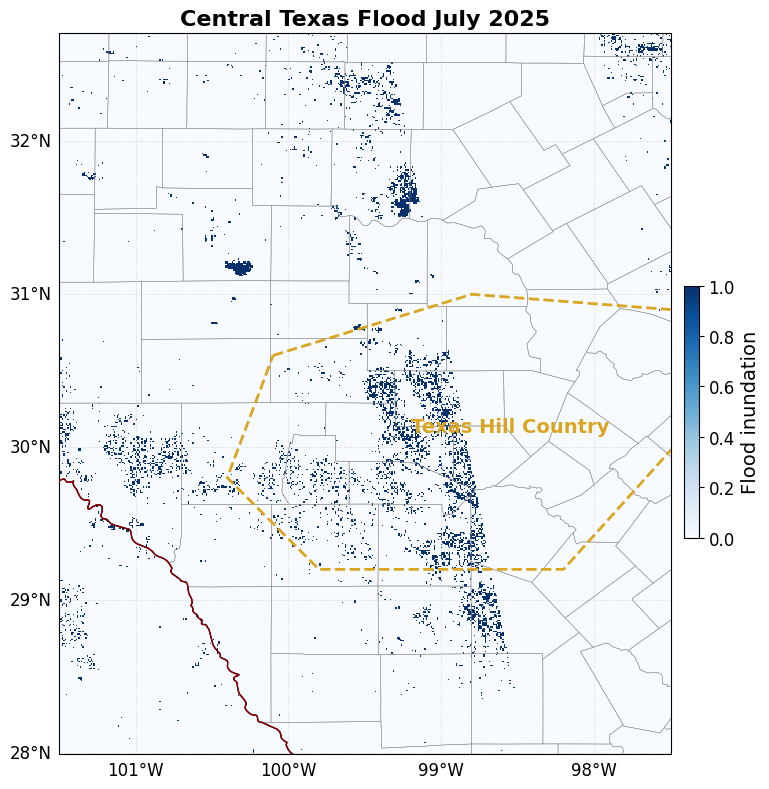

In [28]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
from shapely.geometry import Polygon
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- states/provinces layer ---
shpfilename_states = shpreader.natural_earth(
    resolution='10m', category='cultural', name='admin_1_states_provinces'
)
states = cfeature.ShapelyFeature(
    shpreader.Reader(shpfilename_states).geometries(),
    ccrs.PlateCarree(),
    edgecolor='darkred',
    facecolor='none',
    linewidth=0.8
)

# --- counties layer ---
shpfilename_counties = shpreader.natural_earth(
    resolution='10m', category='cultural', name='admin_2_counties'
)
counties = cfeature.ShapelyFeature(
    shpreader.Reader(shpfilename_counties).geometries(),
    ccrs.PlateCarree(),
    edgecolor='gray',
    facecolor='none',
    linewidth=0.3
)

# --- plot setup ---
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": ccrs.PlateCarree()})
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")
ax.add_feature(states, zorder=3)
ax.add_feature(counties, zorder=2)

# OPTIONAL: zoom into Texas
# ax.set_extent([-107, -92, 25, 37], crs=ccrs.PlateCarree())

# --- your data mask ---
im = s1_diff_mask.plot(
    cmap='Blues',
    ax=ax,
    add_colorbar=False,
    transform=ccrs.PlateCarree()
)

# --- small colorbar (inset) ---
cax = inset_axes(ax, width="2.5%", height="35%", loc="lower left",
                 bbox_to_anchor=(1.02, 0.3, 1, 1),  # push it to the right of the map
                 bbox_transform=ax.transAxes,
                 borderpad=0)
cb = plt.colorbar(im, cax=cax, orientation='vertical')
cb.ax.tick_params(labelsize=12)  # increased font size for ticks
cb.set_label("Flood inundation", fontsize=14)  # increased font size for label

# --- mark the Texas Hill Country ---
hill_country_coords = [
    (-100.1, 30.6), (-98.8, 31.0), (-97.5, 30.9),
    (-97.3, 30.2), (-98.2, 29.2), (-99.8, 29.2),
    (-100.4, 29.8), (-100.1, 30.6)
]
hill_poly = Polygon(hill_country_coords)
hill_fc = cfeature.ShapelyFeature(
    [hill_poly], ccrs.PlateCarree(),
    facecolor='none',
    edgecolor='goldenrod',
    linewidth=2,
    linestyle='--'
)
ax.add_feature(hill_fc, zorder=5)

ax.text(-99.2, 30.1, "Texas Hill Country",
        transform=ccrs.PlateCarree(),
        fontsize=14, weight='bold',  # larger font
        color='goldenrod',
        zorder=6)

ax.set_title('Central Texas Flood July 2025', fontsize=16, weight='bold')  # larger title

# --- lat/lon gridlines ---
gl = ax.gridlines(draw_labels=True, linewidth=0.6, alpha=0.6, linestyle=':')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {"fontsize": 12}  # bigger x-axis labels
gl.ylabel_style = {"fontsize": 12}  # bigger y-axis labels
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = MultipleLocator(1)
gl.ylocator = MultipleLocator(1)

plt.tight_layout()
plt.savefig('central_texas_flood.png', dpi=500)